# PROJECT: HANDWRITTEN LETTER CLASSIFICATION

USING PCA, T-SNE, NEURAL NETWORK, AND SVM

IMPORTING THE DEPENDENCIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import os
import warnings
warnings.filterwarnings('ignore')

CREATING THE DATASET

In [ ]:
path = 'folder/'
files = os.listdir(path)
classes = {"A":0, "B":1, "C":2, "D":3, "E":4, "F":5, "G":6, "H":7, "J":8, "K":9}
print(files)

['E', 'H', 'K', 'C', 'G', 'A', 'J', 'D', 'F', 'B']


UPLOADING THE DATASET

In [ ]:
import cv2

X = []
Y = []

for i in classes:
    new_path = path + i
    for img_name in os.listdir(new_path):
        img = cv2.imread(new_path + "/" + img_name)
        X.append(img)
        Y.append(classes[i])
    print(f'Data Uploaded Successfully', {i})

Data Uploaded Successfully {'A'}
Data Uploaded Successfully {'B'}
Data Uploaded Successfully {'C'}
Data Uploaded Successfully {'D'}
Data Uploaded Successfully {'E'}
Data Uploaded Successfully {'F'}
Data Uploaded Successfully {'G'}
Data Uploaded Successfully {'H'}
Data Uploaded Successfully {'J'}
Data Uploaded Successfully {'K'}


In [ ]:
# counting the datapoints for each class label
pd.Series(Y).value_counts()

4    78
7    75
6    65
8    63
0    63
5    62
3    55
1    53
9    46
2    25
dtype: int64

In [ ]:
# Converting the list data type to numpy array to use numpy functions and easy calculations.

print(type(X))
X = np.array(X)
Y = np.array(Y)
print(type(Y))
print(type(X))

<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# This is basically telling the number of samples in list X
X.shape

(585,)

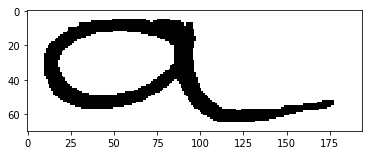

In [ ]:
# Displaying the 6th image or image at 5th index from a list containing 585 samples.
plt.imshow(X[5], cmap='gray')

RESIZING THE DIMENTIONS OF EACH IMAGE IN 28X28 FORM

In [ ]:
# Resizing the dimention of each image into 28x28 form.
# and then storing these to a new folder named 'resized_data'

X = []
Y = []

resized_images_path = 'resized_data/'

for i in classes:
    new_path = path + i
    for img_name in os.listdir(new_path):
        img = cv2.imread(new_path + '/' + img_name)

        # Resize the image to a specific width and height
        new_width = 28
        new_height = 28
        img = cv2.resize(img, (28,28))

        X.append(img)
        Y.append(classes[i])

        # Save the resized images
        resized_img_path = resized_images_path + img_name
        cv2.imwrite(resized_img_path, img)

    print(f'Data Uploaded Successfully:{i}')

Data Uploaded Successfully:A
Data Uploaded Successfully:B
Data Uploaded Successfully:C
Data Uploaded Successfully:D
Data Uploaded Successfully:E
Data Uploaded Successfully:F
Data Uploaded Successfully:G
Data Uploaded Successfully:H
Data Uploaded Successfully:J
Data Uploaded Successfully:K


In [ ]:
print(img.shape)

(28, 28, 3)


In [ ]:
# Converting the list to numpy array

print(type(X))
X = np.array(X)
Y = np.array(Y)
print(type(Y))
print(type(X))

<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(X.shape)

(585, 28, 28, 3)


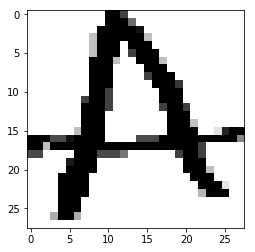

In [ ]:
plt.imshow(X[0],cmap='gray')

RESHAPING

The purpose of reshaping X into X_new is to transform the images from their original format into a flattened representation where each sample is represented as a single row. This has been done to feed it into a machine learning algorithm that requires a 2D input format (samples as rows and features as columns)

In [ ]:
# Reshaping the Dataset

X_new = X.reshape(len(X),-1)

#Printing the new shape
print(X_new.shape)
print(Y.shape)

(585, 2352)
(585,)


TRAIN-TEST-SPLIT

TRAINING DATASET --------> 80 Percent


TESTING DATASET ----------> 20 Percent

In [ ]:
# Splitting the Dataset into Training Dataset and Test Dataset

X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=.20, random_state=10)

In [ ]:
# Checking the sample split of training and test data.

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(468, 2352) (468,)
(117, 2352) (117,)


468 -----> Train samples

117 -----> Test samples

In [ ]:
# Displaying the Flattened Data at index 10.

print(X_train[10])

[255 255 255 ... 255 255 255]


FEATURE SCALING

To Normalizing the pixel values to unit value, We are dividing with the maximum value in the dataset

In [ ]:
#Printing the maximum values for train and test data set

print(X_train.max())
print(X_test.max())

# Dividing the train and test data with the maximum value in dataset
X_train = X_train/255
X_test = X_test/255

# Now printing the updated maximum value from the dataset
print(X_train.max())
print(X_test.max())

255
255
1.0
1.0


DIMENTIONALITY REDUCTION: USING PRINCIPLE COMPONENT ANALYSIS

FEATURE SELECTION USING PCA

In [ ]:
# Printing the shapes of the arrays
print(X_train.shape, X_test.shape)

# To Retain 98% of the variance in the data.
pca = PCA(.98)

# First fits the PCA Model to the Data and then transforms it.
X_train = pca.fit_transform(X_train)

# This ensures that the same transformation  learned from X_train is applied to X_test
X_test = pca.transform(X_test)

# Printing the new shapes of the arrays X_train and X_test after applying PCA.
print(X_train.shape, X_test.shape)

# To print the number of components (n_components) and the number of features (n_features_) in the PCA in the model.
print(pca.n_components)
print(pca.n_features_)

(468, 2352) (117, 2352)
(468, 287) (117, 287)
0.98
2352


In [ ]:
Y_test[:10]

array([7, 1, 0, 8, 3, 3, 7, 8, 5, 2])

MIN MAX SCALING

In [ ]:
# Min Max Scaling
min_max_scaler = MinMaxScaler()

# Scaling each feature in the range of 0 to 1
X_train_scaled = min_max_scaler.fit_transform(X_train)

# To ensure that the scaling is consistent between the training and testing dataset.
X_test_scaled = min_max_scaler.transform(X_test)

# To print the maximum value among the scaled features
print(X_train_scaled.max())
print(X_test_scaled.max())

1.0000000000000002
1.389904634752797


In [ ]:
# To return the sorted unique elements of an array.
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
print(X_train[10])

[-4.12982944e+00 -1.62594701e+00 -2.94972612e+00 -1.78067519e+00
 -1.88458817e-01  1.21827114e+00  2.72498827e-01 -2.18300373e+00
 -2.98133893e+00  1.64666192e+00  1.01363410e+00  6.58386245e-01
 -8.28972420e-01 -3.77187598e+00 -1.36392548e+00  2.90686930e+00
 -1.25038115e+00  2.05996776e+00 -7.94324819e-01 -3.04924327e+00
  2.87045257e+00  7.75373363e-02 -8.90837003e-01 -2.67182571e+00
 -1.22195849e+00 -2.63295603e-01 -1.60991636e+00  1.24355899e+00
 -1.39443803e+00 -4.31106673e-01  1.10836825e+00  1.06427580e+00
  6.41517759e-01 -1.14669658e-01 -1.80676577e+00  5.42359974e-01
 -3.01998913e-01  1.77639829e+00 -1.50577597e+00 -7.22080501e-01
  1.92102050e+00 -4.14895628e-01 -6.70911352e-01 -5.93747082e-02
  6.50114003e-01  4.44353375e-01 -7.93052234e-01  1.66703264e-01
  1.13913612e+00 -1.86340939e+00  1.24288976e+00 -2.35680851e-01
  7.68878513e-01  8.34635707e-01  4.64546455e-02 -1.29427491e+00
  1.25285855e+00 -1.26760034e-01 -2.68704810e+00 -1.49607404e+00
  9.49995200e-02  4.76496

In [ ]:
print(X_train[10].shape)

(287,)


CONVOLUTIONAL NEURAL NETWORK : CNN

BUILDING A NEURAL NETWORK MODEL

In [ ]:
# importing Tensor Flow
import tensorflow as tf

# Setting the random seed to ensure that the results are reproducible
tf.random.set_seed(3)

# Importing Keras Library from Tensor Flow
from tensorflow import keras

#Importing Confusion Matrix to evaluate the performance of classification models.
from tensorflow.math import confusion_matrix


In [ ]:
# Defining a Sequential Model with three Dense layers.
model = keras.Sequential([
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='tanh'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
# Compiling the Sequential model using Adam Optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
# Here,The entire training dataset is passed through the model 15 times to learn and get trained.
model.fit(X_train, Y_train, epochs=15)

Epoch 1/15
15/15 [==============================] - 1s 3ms/step - loss: 2.2512 - accuracy: 0.2244
Epoch 2/15
15/15 [==============================] - 0s 3ms/step - loss: 1.7359 - accuracy: 0.4637
Epoch 3/15
15/15 [==============================] - 0s 5ms/step - loss: 1.3783 - accuracy: 0.6859
Epoch 4/15
15/15 [==============================] - 0s 4ms/step - loss: 1.0792 - accuracy: 0.8291
Epoch 5/15
15/15 [==============================] - 0s 4ms/step - loss: 0.8293 - accuracy: 0.8889
Epoch 6/15
15/15 [==============================] - 0s 5ms/step - loss: 0.6296 - accuracy: 0.9316
Epoch 7/15
15/15 [==============================] - 0s 4ms/step - loss: 0.4747 - accuracy: 0.9637
Epoch 8/15
15/15 [==============================] - 0s 4ms/step - loss: 0.3586 - accuracy: 0.9850
Epoch 9/15
15/15 [==============================] - 0s 4ms/step - loss: 0.2747 - accuracy: 0.9893
Epoch 10/15
15/15 [==============================] - 0s 4ms/step - loss: 0.2116 - accuracy: 0.9957
Epoch 11/15
15/15 [

ACCURACY ON TEST DATA

In [ ]:
# Evaluating the trained model using the test data
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 0.4945 - accuracy: 0.8547
0.8547008633613586


ACCURACY OF CNN ON TRAINING DATA --------> 100 Percent

ACCURACY OF CNN ON TESTING DATA ------> 85 Percent

In [ ]:
print(X_test.shape)

(117, 287)


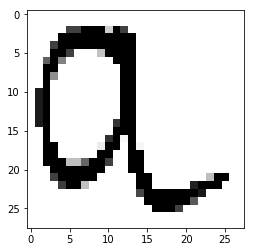

In [ ]:
# Displaying 6th image in X_test
plt.imshow(X[5])

In [ ]:
# Printing the Label associated with the first sample in the test set
print(Y_test[0])

7


In [ ]:
# Using the trained model to make predictions on the test data
Y_predict = model.predict(X_test)

In [ ]:
print(Y_predict.shape)

(117, 10)


In [ ]:
print(Y_predict[0])

[0.15593854 0.376974   0.4696275  0.30980846 0.37715256 0.77284527
 0.2534018  0.9926052  0.3306234  0.67607594]


In [ ]:
# Converting the prediction probabilities to class Label
label_for_first_image = np.argmax(Y_predict[0])
print(label_for_first_image)

7


In [ ]:
# Conerting the prediction probabilities to class label for all test data points
Y_predict_labels = [np.argmax(i) for i in Y_predict]
print(Y_predict_labels)

[7, 4, 0, 8, 3, 4, 7, 8, 5, 4, 3, 4, 7, 9, 6, 6, 1, 1, 4, 5, 5, 6, 5, 6, 4, 8, 5, 6, 3, 1, 2, 6, 1, 7, 3, 8, 8, 4, 3, 7, 3, 4, 9, 9, 5, 8, 3, 8, 4, 0, 6, 7, 9, 3, 3, 3, 1, 6, 3, 1, 8, 6, 3, 0, 4, 0, 0, 1, 5, 5, 7, 7, 7, 7, 9, 9, 3, 6, 1, 4, 6, 8, 4, 6, 6, 7, 5, 4, 2, 0, 0, 5, 4, 5, 7, 1, 1, 6, 6, 4, 3, 8, 3, 7, 7, 5, 0, 3, 9, 9, 5, 4, 3, 5, 9, 3, 1]


In [ ]:
print(Y_predict)

[[0.15593854 0.376974   0.4696275  ... 0.9926052  0.3306234  0.67607594]
 [0.11547917 0.9212204  0.29540607 ... 0.08434361 0.617257   0.3232301 ]
 [0.9934572  0.49983957 0.36694306 ... 0.10131136 0.07594386 0.5349803 ]
 ...
 [0.35454977 0.58541346 0.12500891 ... 0.8283477  0.15502861 0.95830786]
 [0.39595363 0.27679095 0.39886194 ... 0.7729111  0.8443713  0.08199215]
 [0.12516883 0.99645656 0.1865009  ... 0.09065741 0.42132744 0.43985772]]


Y_test ----------> True Labels

Y_predict_labels ---------> Predicted Labels

CONFUSION MATRIX

In [ ]:
# Building a confusion matrix using true labels and predicted labels.
conf_matrix = confusion_matrix(Y_test, Y_predict_labels)

In [ ]:
# Printing the Confusion Matrix
print(conf_matrix)

tf.Tensor(
[[ 7  0  0  1  1  0  0  0  0  0]
 [ 0 10  0  1  1  0  0  1  0  0]
 [ 0  0  2  0  2  0  0  0  0  0]
 [ 0  0  0 15  1  0  0  0  0  0]
 [ 1  1  0  0 10  1  0  0  0  0]
 [ 0  0  0  0  0 13  1  0  0  1]
 [ 0  0  0  1  1  0 14  0  1  0]
 [ 0  0  0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  1  0  8]], shape=(10, 10), dtype=int32)


VISUALIZING THE CONFUSION MATRIX

Text(0.5,42,'Predicted Labels')

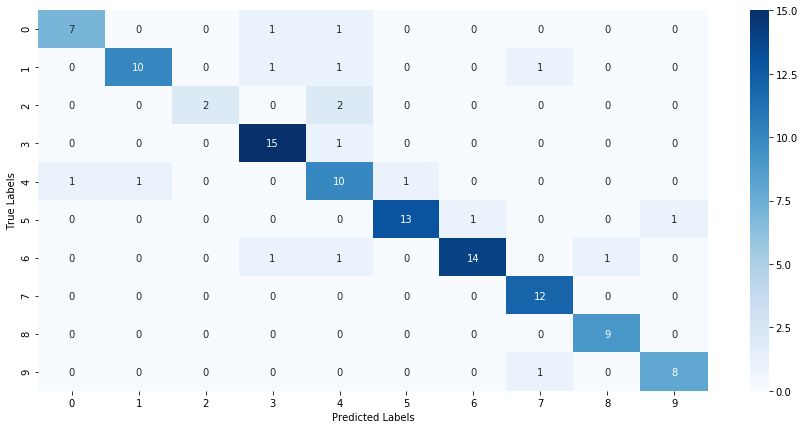

In [ ]:
# Heatmap visualization of Confusion Matrix
plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

HYPER PARAMETER TUNING

In [ ]:
!pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# Hyper Parameter Tuning
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Define the model builder function
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32),
                                 activation=hp.Choice('activation_1', values=['relu', 'tanh', 'sigmoid'])))
    model.add(keras.layers.Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32),
                                 activation=hp.Choice('activation_2', values=['relu', 'tanh', 'sigmoid'])))
    model.add(keras.layers.Dense(units=hp.Int('units_3', min_value=32, max_value=128, step=32),
                                 activation=hp.Choice('activation_3', values=['relu', 'tanh', 'sigmoid'])))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Instantiate the tuner
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=10,
                    executions_per_trial=1, directory='tuner_results',
                    project_name='my_model_tuning')

# Perform Hyperparameter Search
tuner.search(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

# Retrieve the best model
best_model = tuner.get_best_models(1)[0]

# Fit the best model with the complete training data
best_model.fit(X_train, Y_train, epochs=10)

# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, Y_test)
train_loss, train_accuracy = best_model.evaluate(X_train, Y_train)

# Printing the Best Parameters
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

print("Best Hyperparameters: ", best_hyperparameters)


INFO:tensorflow:Reloading Tuner from tuner_results/my_model_tuning/tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
15/15 [==============================] - 1s 4ms/step - loss: 0.2576 - accuracy: 0.9893
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 0.2010 - accuracy: 0.9893
Epoch 3/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1587 - accuracy: 0.9936
Epoch 4/10
15/15 [==============================] - 0s 5ms/step - loss: 0.1271 - accuracy: 0.9957
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1042 - accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0865 - accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0732 - accuracy: 1.0000: 0s - loss: 0.0754 - accuracy: 1.00
Epoch 8/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0623 - accuracy: 1.0000
Epoch 9/10
15/15 [==============================] - 0s 3ms/step

In [ ]:
# Printing the best parameters
best_hyperparameers = tuner.get_best_hyperparameters(1)[0]
print("Best Hyperparameters: ", best_hyperparameters)

Best Hyperparameters:  <keras_tuner.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7fc01f2e66a0>


In [ ]:
# Printing the Accuracy of Training and Test Dataset
print(f'Accuracy on Training Data: ', train_accuracy)
print(f'Accuracy on Test Data: ', test_accuracy)

Accuracy on Training Data:  1.0
Accuracy on Test Data:  0.8803418874740601


Training Accuracy --------> 100 Percent

Testing Accuracy ----------> 88 Percent

DIMENTIONALITY REDUCTION TECHNIQUE : T-SNE

IMPLEMENTING T-SNE

In [ ]:
# Reducing the dimentions of the dataset to visualize t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

VISUALIZING THROUGH T-SNE

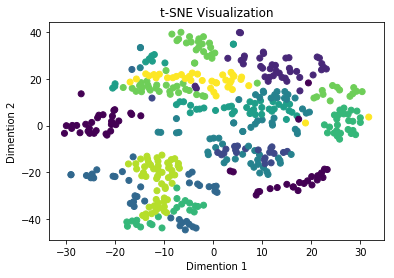

In [ ]:
# Visualizing the Training Dataset through t-SNE
import matplotlib.pyplot as plt

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y_train)
plt.title("t-SNE Visualization")
plt.xlabel("Dimention 1")
plt.ylabel("Dimention 2")
plt.show()

SUPPORT VECTOR MACHINE : SVM

BUILDING SVM MODEL

In [ ]:
# Building SVM Model
from sklearn import svm
classifier = svm.SVC(kernel='linear')

In [ ]:
# Fitting the SVM Model to Training Dataset

classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
# Accuracy score on training data

X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
# Printing the Accuracy of Training Dataset

print("Accuray score of the training data: ", training_data_accuracy)


Accuray score of the training data:  1.0


In [ ]:
# Accuracy score on test data

X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


In [ ]:
# Printing the Accuracy of Test Data

print("Accuracy Score of the Test Data: ", test_data_accuracy)




Accuracy Score of the Test Data:  0.9487179487179487


TRAINING ACCURACY --------> 100 Percent

TESTING ACCURACY  --------> 94 Percent

HYPER-PARAMETER TUNING OF SVM MODEL

In [ ]:
# Hyper Parameter Tuning
param_grid = {'C' : [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto']}

grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)


# Retrieve the best hyper-parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model on Training Data
best_model.fit(X_train, Y_train)

# Accuracy score on Training Data
training_data_accuracy = best_model.score(X_train, Y_train)

# Accuracy score on Test Data
test_data_accuracy = best_model.score(X_test, Y_test)

# Print the Best Parameters and Accuracy
print("Best Hyperparameters: ",best_params )
print("Traning Accuracy: ", training_data_accuracy)
print("Test Accuracy: ", test_data_accuracy)


Best Hyperparameters:  {'C': 0.1, 'gamma': 0.1}
Traning Accuracy:  1.0
Test Accuracy:  0.9487179487179487


TRAINING ACCURACY OF SVM MODEL : 100 Percent

TEST ACCURACY OF SVM MODEL : 94 Percent

BEST HYPE-PARAMETERS : {'C':0.1, 'gamma': 0.1}
